In [1]:
import os,sys
from dotenv import load_dotenv, find_dotenv

load_dotenv(find_dotenv())

os.environ['PYTHONPATH']=os.environ.get('LIB')
if not os.environ.get('LIB') in sys.path: 
    sys.path.insert(0,os.environ.get('LIB'))

INP_DIR = os.environ.get('DAT_DIR')    
FIG_DIR = os.environ.get('FIG_DIR')

%load_ext autoreload
%autoreload 2
%pylab inline
%load_ext rpy2.ipython

import matplotlib.text as text
import pandas as pd
import numpy as np
import pylab as pl
import scipy as sp
import sys
import rpy2 
import os 
from matplotlib import gridspec
from scipy.interpolate import splev, splrep
import seaborn as sns
from scipy import stats
import rpy2.robjects.packages as rpackages
import seaborn as sns
from statsmodels import robust
from box import Box


pd.set_option('display.max_colwidth', 500)

import warnings
warnings.filterwarnings('ignore')


Populating the interactive namespace from numpy and matplotlib



# A strategy for creating dilutions of reference materials for evaluating gene level concentration-response models

### HTTr Team Meeting
### October 6, 2020

### Imran Shah



# Approach

* Find dilutions of the two reference materials that will be used to generate transcriptomic profiles 
* The fold change values for individual genes in the profiles should fit specific curve shapes 

## Definitions

* Reference material - sample mix 1 ($s_1$) and sample mix 2 ($s_2$)
* Raw profiles of $s_1$ and $s_2$ are $\bf{r}_1$ and $\bf{r}_2$, respectively
* $\bf{r} = \{r_1,r_2,r_3,...,r_j,..\}$ where $r_j$ is the count for gene (probe) $g_j$  
* The differential expression profile $\bf{x}$ for  $\bf{r}_1$ and $\bf{r}_2$ are $\bf{x}_1$ and $\bf{x}_2$, respectively

## Dilutions

* Assume that $s_1$,$s_2$ will be diluted to generate new samples that can be analyzed to generate differential expression profiles $\bf{x}$
* Dilutions of $s_1$ and $s_2$ are $d_1$ and $d_2$, respectively,  where $0 \le d \le 1$ 
* Upon dilution, the level of expression (counts) for $g_j$ in $s_1$ will be $d_1.r_1$ and in $s_2$ will be $d_2.r_2$  

## Fold changes
The $log_2$ fold change (L2FC) for $g_j$ in normal samples

&nbsp;&nbsp;&nbsp;$x = log_2 \frac{r_1}{r_2}$

The L2FC for $g_j$ in the diluted sample 

&nbsp;&nbsp;&nbsp; $x' = log_2 \frac{d_1.r_1}{d_2.r_2}$

Relating the diluted $log_2$ ($x'$) to original fold change ($x$)

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{align}
 x' & = log_2(\frac{d_1.r_1}{d_2.r_2})\\
 x' & = log_2(\frac{d_1}{d_2}) + log_2(\frac{r_1}{r_2})\\
 x' & = log_2(\frac{d_1}{d_2}) + x
\end{align}
$

## Dilution ratio

The actual dilutions $d_1$ and $d_2$ depend on physical/measurement limitations

For this analysis we use the ratio of dilutions

&nbsp;&nbsp;&nbsp;&nbsp;  $\alpha =\frac{d_1}{d_2}$

Therefore 

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{align}
 x' & = log_2(\frac{d_1}{d_2}) + x\\
 x' & = log_2 \alpha + x
\end{align}
$

*Interestingly, dilution can only "shift" the original L2FC values ...*

## Concentration-response
The fold change and concentration pairs $((x_1,c_1), (x_2,c_2)...)$ can be fitted by analytic concentration-response functions $f(c,\phi)$ where the parameters $\phi$ are shape-specific (see tcpl.fit.crvfit.CRCurve)

$f(c,\phi) \in (hill, gnls, polyN, expN)$ from tcplfit2

$y = f(c,\phi)$ where y is he fitted value of the response

Select values of:

$c = \{c_1, c_2, c_3, c_4, ...\}$  

concentration-response, $f$ 

parameters, $\phi$ 

 

## Relating concentraion-response to dilution
Select values of $c = \{c_1, c_2, c_3, c_4, ...\}$ and parameters $\phi$ for $f$ such that the response at a given $c$ (i.e. $f(c)$) is equal to the diluted L2FC ($x'$)

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{align}
 f(c) & = x'\\
 f(c) & = log_2(\frac{d_1}{d_2}) + x\\
 log_2 \alpha & = f(c) - x \\
 \alpha  & = 2^{f(c) - x}
\end{align}
$

Use this to plug in the shape of curve ($f$), top to get $\alpha$ (or solve for any variable)

# Examples 

Different examples of fits with varying $\alpha$ and top for a single gene

## Hill CR

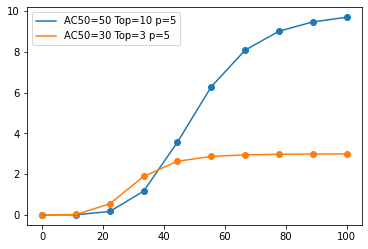

In [2]:
from tcpl.fit.crvfit import *
CV1 = CRCurve()
C1 = np.linspace(0,100,num=10)
Y1 = CV1.hillF(x=C1,ga=50,tp=10,p=5)
Y2 = CV1.hillF(x=C1,ga=30,tp=3,p=5)
pl.scatter(C1,Y1)
pl.plot(C1,Y1,label="AC50=50 Top=10 p=5")
pl.scatter(C1,Y2)
pl.plot(C1,Y2,label="AC50=30 Top=3 p=5")
pl.legend()

## Hill: varying $\alpha$ and top FC

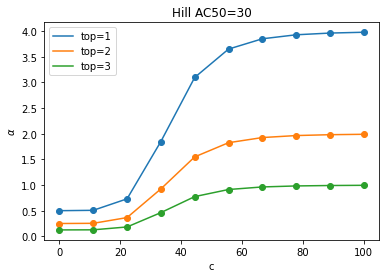

In [3]:
from tcpl.fit.crvfit import *
#pl.figure(figsize=(4,3))
CV1 = CRCurve()
C1 = np.linspace(0.01,100,num=10)
Y1 = CV1.hillF(x=C1,ga=30,tp=3,p=5)
x=1; A2 = 2**(Y1-x);pl.scatter(C1,A2);pl.plot(C1,A2,label="top={}".format(x))
x=2; A2 = 2**(Y1-x);pl.scatter(C1,A2);pl.plot(C1,A2,label="top={}".format(x))
x=3; A2 = 2**(Y1-x);pl.scatter(C1,A2);pl.plot(C1,A2,label="top={}".format(x))
pl.legend();pl.xlabel('c');pl.title("Hill AC50=30");x=pl.ylabel(r'$\alpha$')

## Exp4: varying $\alpha$ and top FC

Text(0.5, 1.0, 'Exp4 AC50=30')

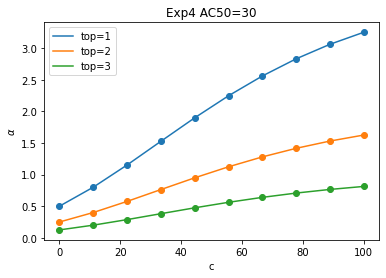

In [4]:
from tcpl.fit.crvfit import *
CV1 = CRCurve()
C1 = np.linspace(0.01,100,num=10)
Y1 = CV1.exp4F(x=C1,ga=30,tp=3,p=5)

x=1; A2 = 2**(Y1-x);pl.scatter(C1,A2);pl.plot(C1,A2,label="top={}".format(x))
x=2; A2 = 2**(Y1-x);pl.scatter(C1,A2);pl.plot(C1,A2,label="top={}".format(x))
x=3; A2 = 2**(Y1-x);pl.scatter(C1,A2);pl.plot(C1,A2,label="top={}".format(x))
pl.legend()
pl.xlabel('c')
x=pl.ylabel(r'$\alpha$');pl.title("Exp4 AC50=30")

# Real TempO-Seq data 

## Load data 
Load the FC for biospyder lysate processed with plate effect and shrinkage. 

In [5]:
from tcpl.db.mongo import *

DB = openMongo(host='fe.epa.gov',db='httr_unilever_comp',auth=True)
#DB.list_collection_names()
#DB.httr_deg.count_documents({})
#DB.httr_deg.find_one().keys

pd.DataFrame(DB.httr_deg.find({},dict(_id=0,pg_id=1,trt_grp_id=1,stype=1,anl_name=1)))


,trt_grp_id,anl_name,stype,pg_id
0,bsp_lysate_1-vs-bsp_lysate_2_pg1,meanncnt0_5-plateteffect_1-shrinkage_normal,QC sample,1
1,bsp_rna_1-vs-bsp_rna_2_pg1,meanncnt0_5-plateteffect_1-shrinkage_normal,QC sample,1
2,bsp_lysate_1-vs-bsp_lysate_2_pg1,meanncnt0_5-plateteffect_1-shrinkage_none,QC sample,1
3,bsp_rna_1-vs-bsp_rna_2_pg1,meanncnt0_5-plateteffect_1-shrinkage_none,QC sample,1


## Fold Change Dist

In [6]:
FC0 = pd.DataFrame(DB.httr_deg.find_one(dict(trt_grp_id='bsp_lysate_1-vs-bsp_lysate_2_pg1',
                                             anl_name='meanncnt0_5-plateteffect_1-shrinkage_normal'))['degs'])\
        .rename(columns=dict(log2FoldChange='l2fc'))

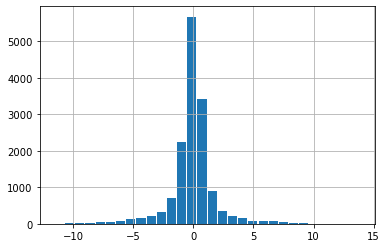

In [7]:
FC0.l2fc.hist(bins=30,rwidth=0.9)

## Estimate $\alpha$ for one Hill function

Generate dilutions to produce L2FC data for one Hill function 

$f = \frac{5}{1+ (\frac{30}{c})^4}$

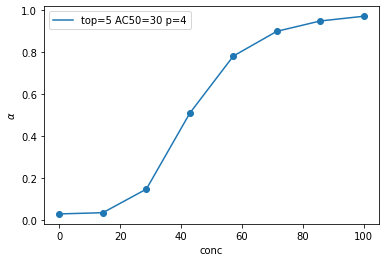

In [8]:
from tcpl.fit.crvfit import *
CV1 = CRCurve()
C1 = np.linspace(0.01,100,num=8)
Y1 = CV1.hillF(x=C1,ga=30,tp=5,p=4)
x=5;A1 = 2**(Y1-x)
pl.scatter(C1,A1);pl.plot(C1,A1,label="top=5 AC50=30 p=4")
pl.legend();pl.xlabel('conc');x1=pl.ylabel(r'$\alpha$')

## Dilutions $\alpha$ for this hill 

In [9]:
Dilutions1 = pd.DataFrame(dict(conc=C1,alpha=A1)).round(decimals=2)
Dilutions1.insert(2,'l2a',np.log2(Dilutions1.alpha))
Dilutions1

,conc,alpha,l2a
0,0.01,0.03,-5.058894
1,14.29,0.04,-4.643856
2,28.58,0.15,-2.736966
3,42.86,0.51,-0.971431
4,57.15,0.78,-0.358454
5,71.43,0.90,-0.152003
6,85.72,0.95,-0.074001
7,100.00,0.97,-0.043943


# Generate synthetic mix 

In [61]:
Res = []

FC = FC0[['probe_id','l2fc']].set_index('probe_id').sort_values('l2fc')
for i,D_i in Dilutions1.iterrows():
    #print(D_i.alpha)
    X_i = FC.l2fc + D_i.l2a
    X_i = X_i.to_dict()
    X_i['conc']=D_i.conc
    X_i['alpha']=D_i.alpha
    Res.append(X_i)
SM1 = pd.DataFrame(Res).set_index(['alpha','conc'])


In [38]:
SM1.T.shape

(15107, 8)

## View the l2FC values for each dilution

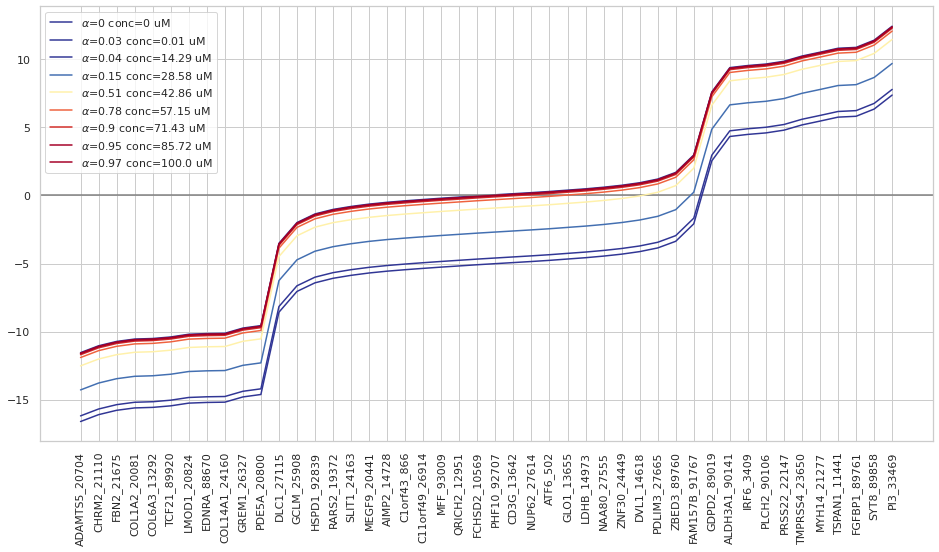

In [118]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('RdYlBu_r', 12)

fig = pl.figure(figsize=(16,8))
ax = pl.subplot(1,1,1)
#FC1 = FC.l2fc.sort_values(ascending=False)[::250]
FC1 = pd.concat((FC.l2fc[0:20:2],FC.l2fc[20:-20:600],FC.l2fc[-20:-1:2]))
ax.plot(FC1,label=r"$\alpha$={} conc={} uM".format(0,0),color=viridis(0))
ax.axhline(c='grey')

for i,(ind,X) in enumerate(SM1.iterrows()):
    #print(r"$\alpha$={} conc={} uM".format(*ind))
    alpha,conc=ind
    ax.plot(X[FC1.index],label=r"$\alpha$={} conc={} uM".format(*ind),color=viridis(alpha))
    
for tick in ax.get_xticklabels(): tick.set_rotation(90)

pl.legend()

## View the l2FC values for each dilution

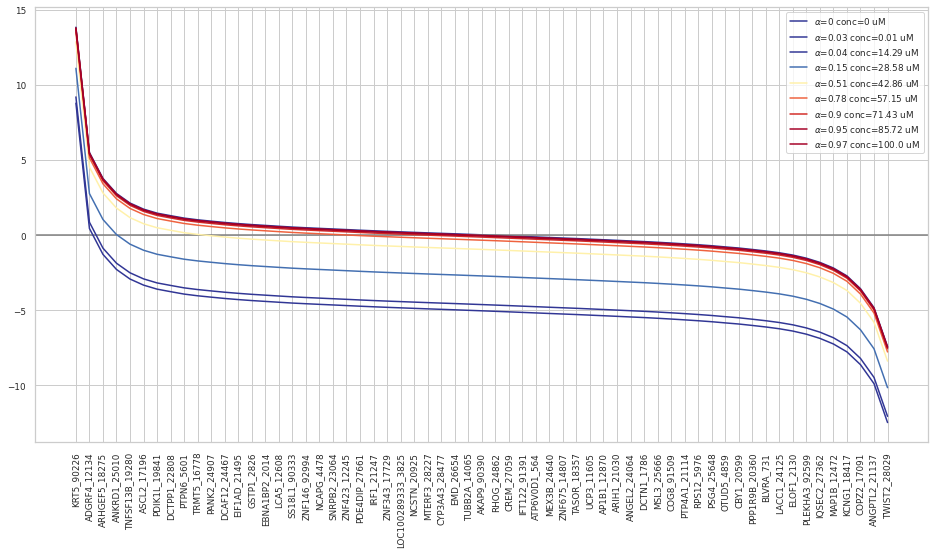

In [66]:
fig

## View L2FC distribution for dilutions

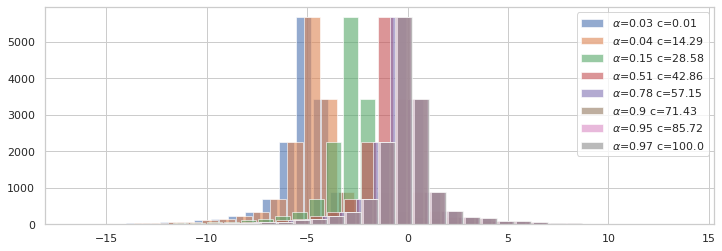

In [116]:
pl.figure(figsize=(12,4))
for i,X_i in SM1.iterrows():
    X_i.hist(bins=30,rwidth=0.9,label=r"$\alpha$={} c={}".format(*i),alpha=0.6)
pl.legend()

## Dilution conc-response

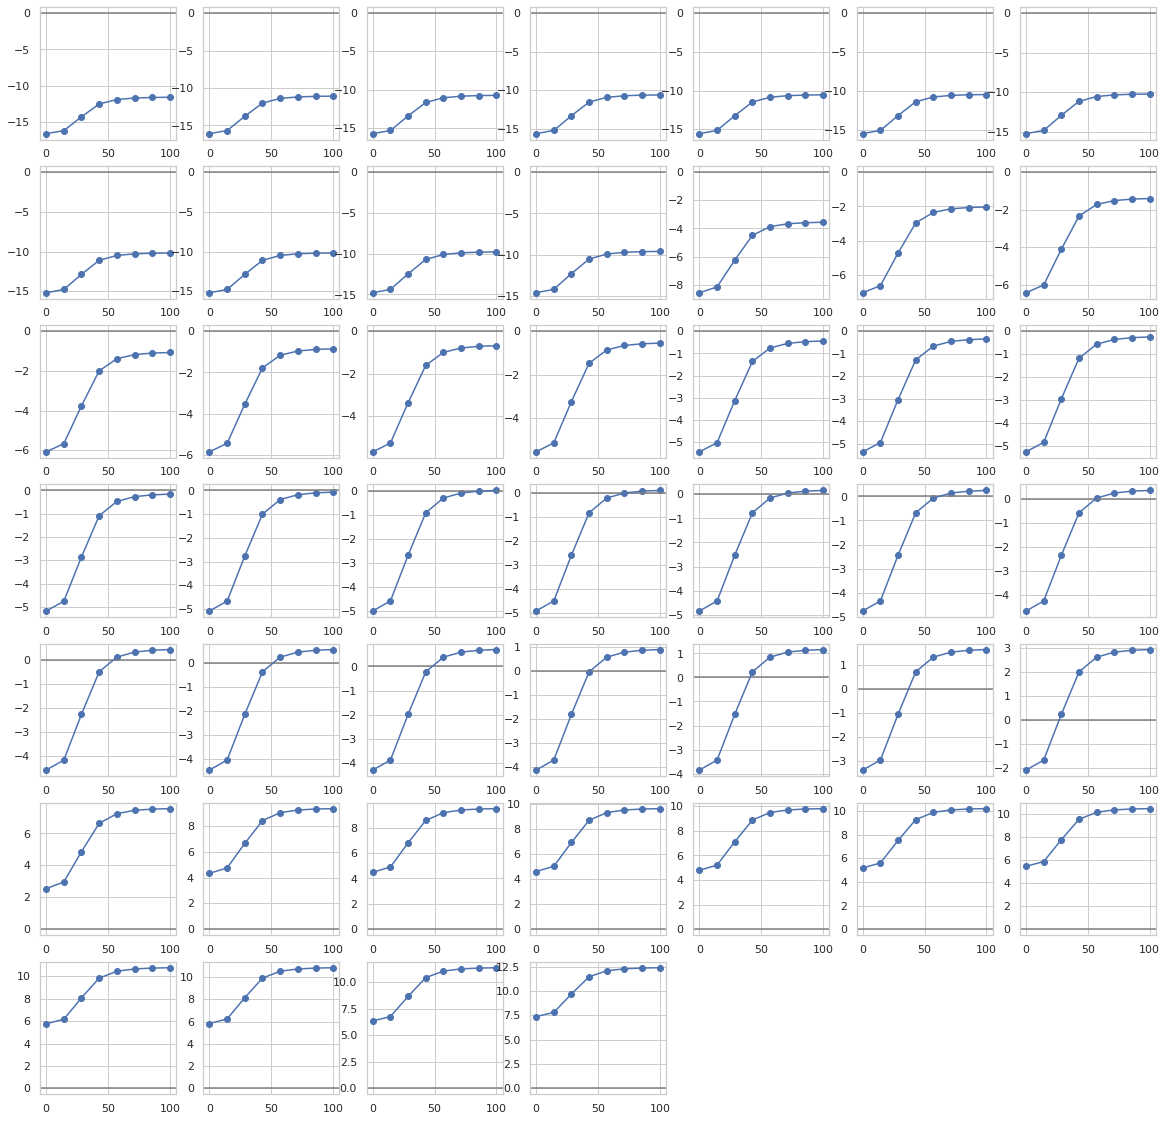

In [119]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import seaborn as sns
sns.set(style='whitegrid')
viridis = cm.get_cmap('RdYlBu_r', 12)

fig = pl.figure(figsize=(20,20))
#FC1 = FC.l2fc.sort_values(ascending=False)[::400]
C = SM1.reset_index()['conc']
for i,probe_id in enumerate(FC1.index):
    ax = pl.subplot(7,7,i+1)
    ax.axhline(c='grey')
    ax.plot(C,SM1[probe_id])
    ax.scatter(C,SM1[probe_id])


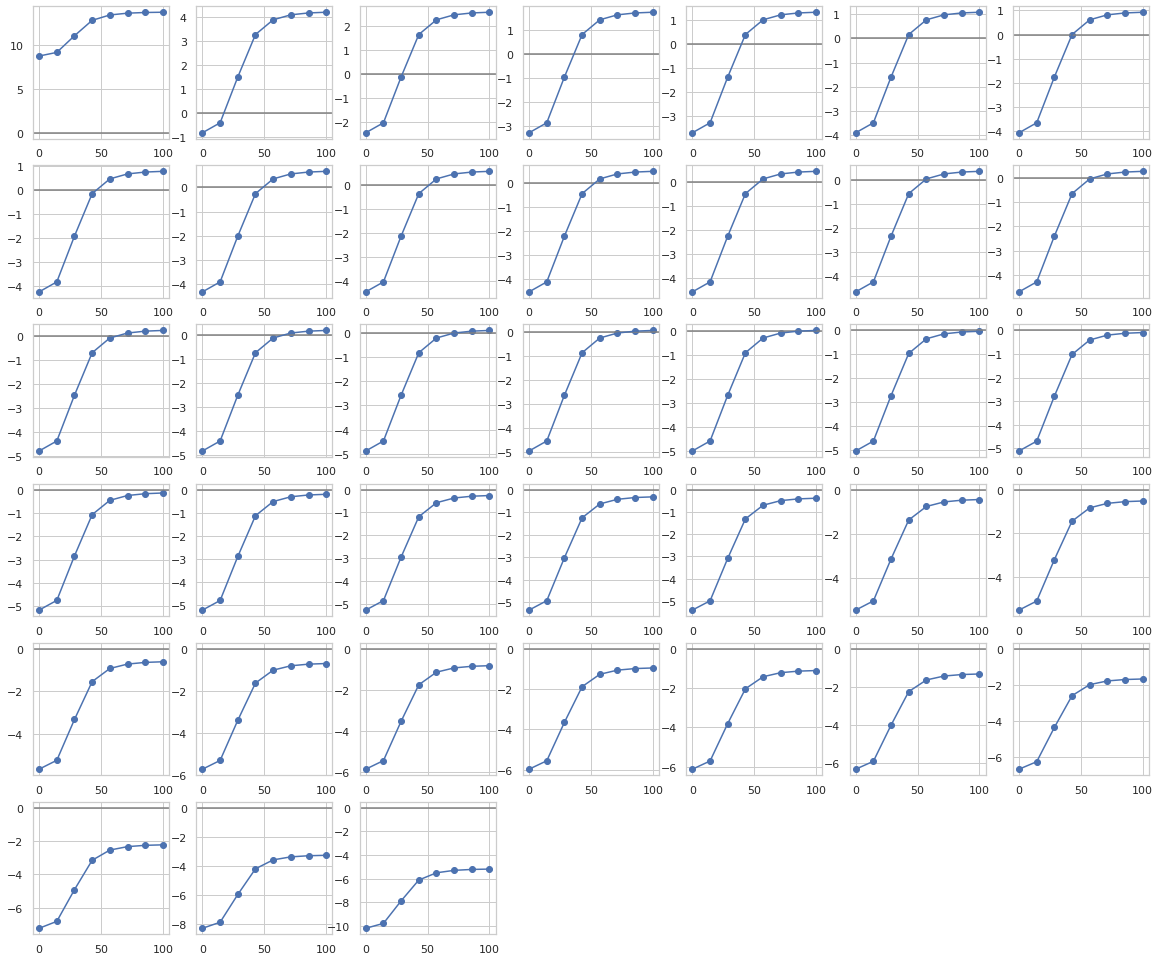

In [69]:
fig

## Calc conc-response

In [15]:
from tcpl.fit.crvfit import *

#1 =SM1.reset_index().conc.to_numpy() 

#F0 = CurveFit(hit_call=True)
#F0.fit(C1,SM1.BIN2_19602.to_numpy(),cutoff=0.5)
#F0(C1,SM1.BIN2_19602.to_numpy(),cutoff=0.5,onesd=1,bmr_magic=1)
#F0.get_summary()

In [120]:
from tcpl.fit.crvfit import *
from joblib import Parallel, delayed
from functools import reduce
import random
import time 


Prb1 = FC1.index

def getFit(probe_id,conc='conc',L2FC=SM1.reset_index()):
    C = L2FC[conc]
    R = L2FC[probe_id]
    CF = CurveFit(hit_call=True)
    CF(C,R,cutoff=0.5,onesd=1,bmr_magic=1)
    H = CF.get_summary()    
    H['probe_id']=probe_id
    
    return H


%time R1= Parallel(n_jobs=40)(delayed(getFit)(pid) for pid in Prb1)

FITS1=pd.DataFrame(R1)




CPU times: user 556 ms, sys: 792 ms, total: 1.35 s
Wall time: 9 s


## Fits

In [121]:
FITS1.sort_values('ac50',ascending=False).head()

,model,aic,top,ac50,n_gt_cutoff,cutoff,fit_method,top_over_cutoff,rmse,tp,...,ac5,ac10,ac20,acc,ac1sd,bmd,conc,resp,probe_id,a
31,cnst,36.902299,0.686109,50.000000,7,0.5,poly1,1.372218,2.116271,NaN,...,5.000000,10.000000,20.000000,72.874735,145.749469,145.749469,0.01|14.29|28.58|42.86|57.15|71.43|85.72|100,-4.12343909905357|-3.70840159977472|-1.80151100416621|-0.0359762578032291|0.577000619087524|0.78345149655495|0.861454008556223|0.891511242412403,DVL1_14618,0.006861
30,cnst,37.274316,0.432654,50.000000,6,0.5,poly1,0.865309,2.211542,NaN,...,5.000000,10.000000,20.000000,115.565684,231.131368,231.131368,0.01|14.29|28.58|42.86|57.15|71.43|85.72|100,-4.30994666905357|-3.89490916977472|-1.98801857416621|-0.222483827803229|0.390493049087524|0.59694392655495|0.674946438556223|0.705003672412403,ZNF30_24449,0.004327
33,poly1,35.066547,1.713513,50.000000,8,0.5,poly1,3.427027,1.736559,NaN,...,5.000000,10.000000,20.000000,29.179814,58.359628,58.359628,0.01|14.29|28.58|42.86|57.15|71.43|85.72|100,-3.36428011805357|-2.94924261877472|-1.04235202316621|0.723182723196771|1.33615960008752|1.54261047755495|1.62061298955622|1.6506702234124,ZBED3_89760,0.017135
34,hill,27.726115,2.873251,38.642096,7,0.5,hill,5.746503,0.944963,2.873251,...,26.036706,28.780703,32.086870,31.359003,35.522773,35.522773,0.01|14.29|28.58|42.86|57.15|71.43|85.72|100,-2.08259265905357|-1.66755515977472|0.239335435833794|2.00487018219677|2.61784705908752|2.82429793655495|2.90230044855622|2.9323576824124,FAM157B_91767,NaN
35,exp5,20.207851,7.630452,19.377511,8,0.5,exp5,15.260905,0.909023,7.630452,...,2.556830,4.475893,8.024073,3.175552,5.598231,5.598231,0.01|14.29|28.58|42.86|57.15|71.43|85.72|100,2.54331144594643|2.95834894522528|4.86523954083379|6.63077428719677|7.24375116408752|7.45020204155495|7.52820455355622|7.5582617874124,GDPD2_89019,NaN


## Fits & Conc-responses

In [122]:
FITS1.set_index('probe_id',inplace=True)

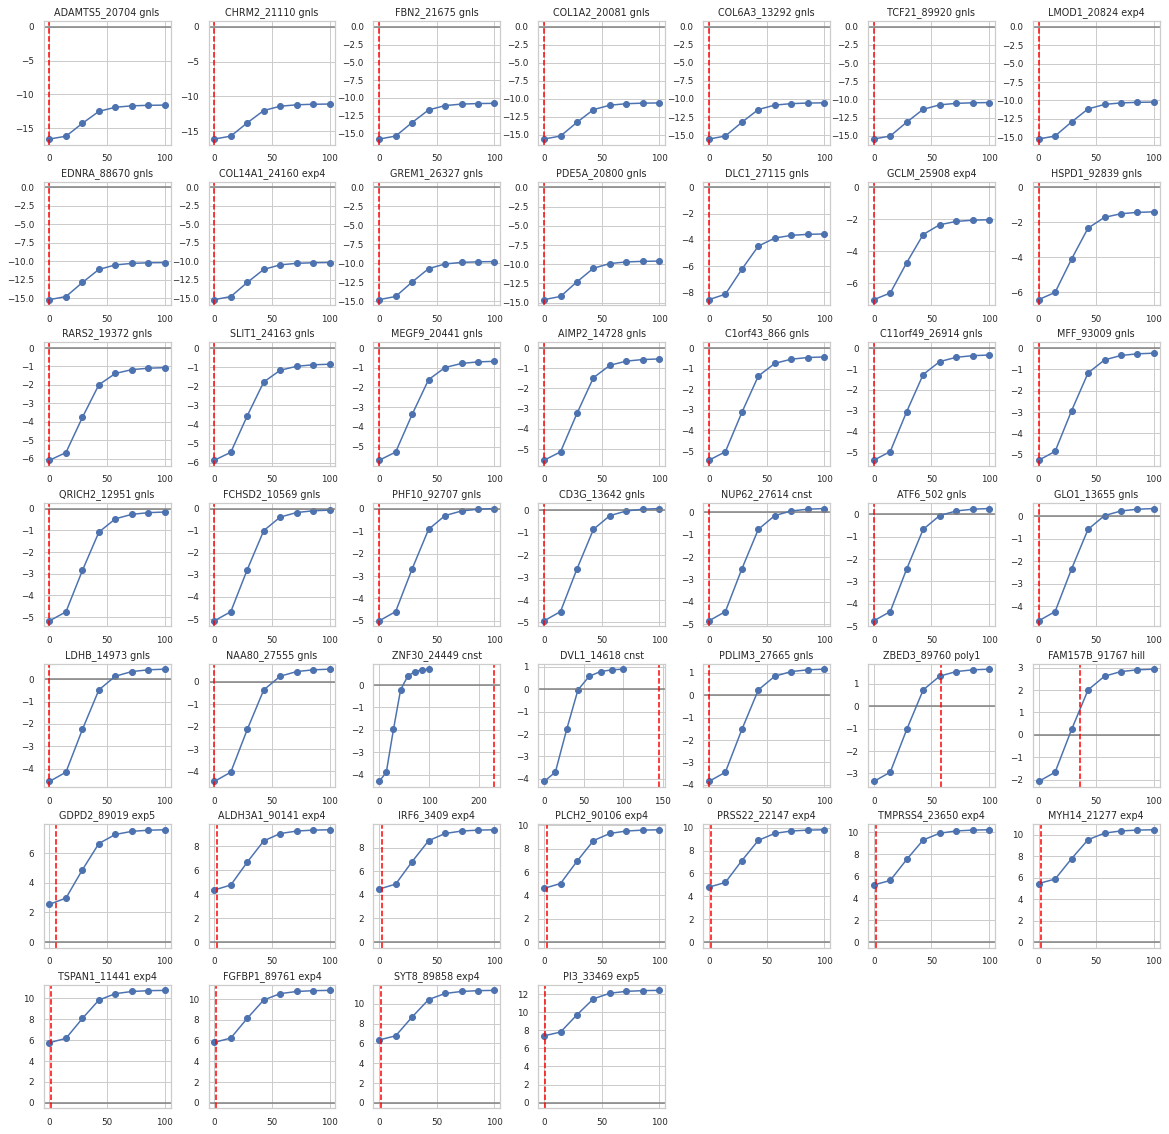

In [123]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
sns.set(style='whitegrid',font_scale=0.8)

fig = pl.figure(figsize=(20,20))
#FC1 = FC.l2fc.sort_values(ascending=False)[::400]
C = SM1.reset_index()['conc']
for i,probe_id in enumerate(FITS1.index):
    F_i = FITS1.loc[probe_id]
    ax = pl.subplot(7,7,i+1)
    ax.axhline(c='grey')
    ax.plot(C,SM1[probe_id])
    ax.scatter(C,SM1[probe_id])
    ax.axvline(F_i.bmd,ls='--',color='red')
    #ax.axvline(F_i.ac50,ls='-',color='green')
    
    ax.set_title("{} {}".format(probe_id,F_i.model))
pl.subplots_adjust(wspace=0.3,hspace=0.3)

## Large set for conc-response 

In [260]:
FC1 = FC.l2fc.sort_values(ascending=False)[::50]

In [262]:
from tcpl.fit.crvfit import *
from joblib import Parallel, delayed
from functools import reduce
import random
import time 


Prb1 = FC1.index

def getFit(probe_id,conc='conc',L2FC=SM1.reset_index()):
    C = L2FC[conc]
    R = L2FC[probe_id]
    CF = CurveFit(hit_call=True)
    CF(C,R,cutoff=0.5,onesd=1,bmr_magic=1)
    H = CF.get_summary()    
    H['probe_id']=probe_id
    
    return H


%time R1= Parallel(n_jobs=40)(delayed(getFit)(pid) for pid in Prb1)

FITS2=pd.DataFrame(R1)




CPU times: user 2.81 s, sys: 1.25 s, total: 4.06 s
Wall time: 18.4 s


## What kinds of fits and BMCs do we get?

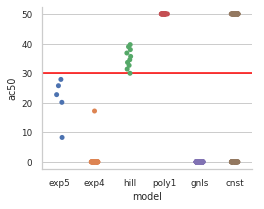

In [275]:
import seaborn as sns

g=sns.catplot('model','ac50',data=FITS2,height=3,aspect=1.2)
g.ax.axhline(30,color='red',label='AC50')
g.add_legend()

## What kinds of tops do we get?

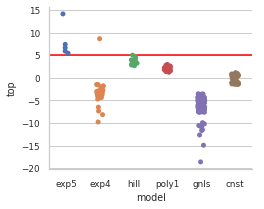

In [277]:
import seaborn as sns

g=sns.catplot('model','top',data=FITS2,height=3,aspect=1.2)
g.ax.axhline(5,color='red',label='top')
g.add_legend()

# Summary 

Looks like dilution will only "shift" the original L2FC values 

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{align}
 x' & = log_2 \alpha + x
\end{align}
$

The conc-response curve $f$ for each gene in profile is identical a given $\alpha$ 

However, $x'$ are shifted in a manner that only allows a small set of genes to be fit to the original $f$ (without considering noise)




# Rescue?

We could shift the response for each $x'$ so that all values are positive(?)

For each $g_j$, the fold change and concentration pairs are: $((x'_1,c_1), (x'_2,c_2)...)$

Define $x'' = x' + \Delta x$ where $\Delta x = min(x'_c) + \epsilon; c_i \in \{c_1, c_2, c_3, ... \}; \epsilon \in N ~ (\mu, \sigma) $

 

## Apply $\Delta x$ to each gene

In [76]:
SM2 = SM1[FC1.index].apply(lambda x: x-x.min(),axis=0)


In [77]:
from tcpl.fit.crvfit import *
from joblib import Parallel, delayed
from functools import reduce
import random
import time 


Prb1 = FC1.index

def getFit(probe_id,conc='conc',L2FC=SM2.reset_index()):
    C = L2FC[conc]
    R = L2FC[probe_id]
    CF = CurveFit(hit_call=True)
    CF(C,R,cutoff=0.5,onesd=1,bmr_magic=1)
    H = CF.get_summary()    
    H['probe_id']=probe_id
    
    return H


%time R2= Parallel(n_jobs=40)(delayed(getFit)(pid) for pid in Prb1)

FITS2=pd.DataFrame(R2)




CPU times: user 79.5 ms, sys: 7.34 ms, total: 86.8 ms
Wall time: 3.43 s


In [78]:
FITS2.set_index('probe_id',inplace=True)


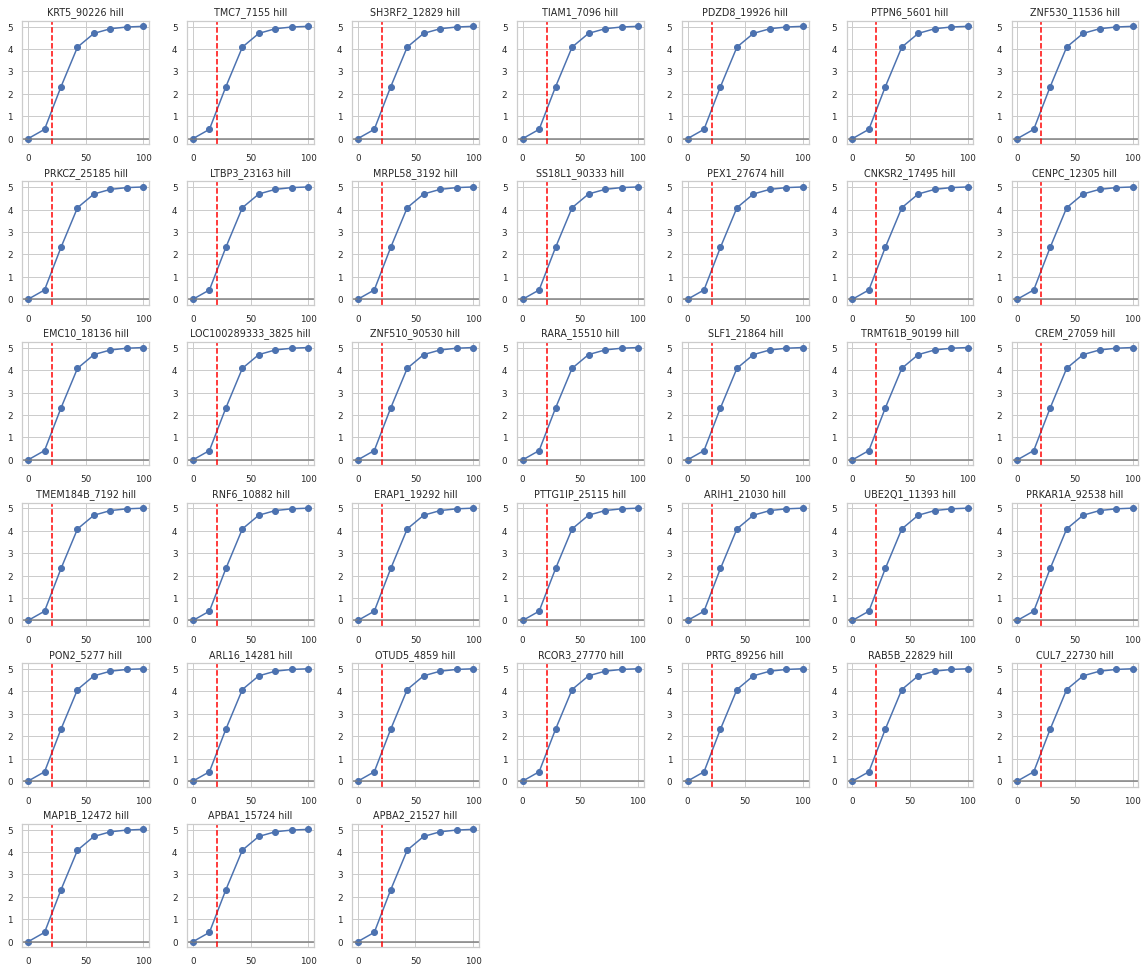

In [79]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sns
sns.set(style='whitegrid',font_scale=0.8)
fig = pl.figure(figsize=(20,20))
FC1 = FC.l2fc.sort_values(ascending=False)[::400]
C = SM2.reset_index()['conc']
for i,probe_id in enumerate(FITS2.index):
    F_i = FITS2.loc[probe_id]
    ax = pl.subplot(7,7,i+1)
    ax.axhline(c='grey')
    ax.plot(C,SM2[probe_id])
    ax.scatter(C,SM2[probe_id])
    ax.axvline(F_i.bmd,ls='--',color='red')
    #ax.axvline(F_i.ac50,ls='-',color='green')
    
    ax.set_title("{} {}".format(probe_id,F_i.model))
pl.subplots_adjust(wspace=0.3,hspace=0.3)

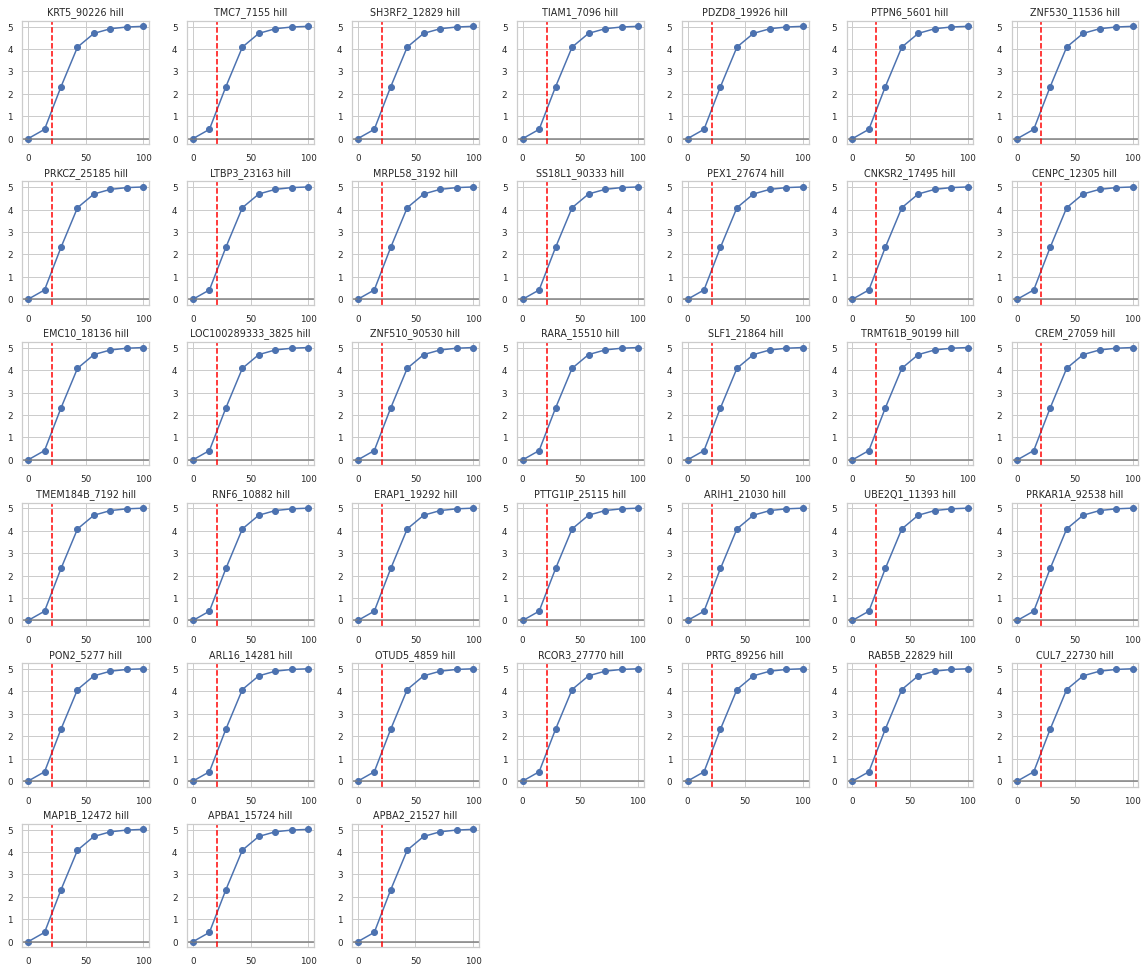

In [54]:
fig

# Selecting dilutions

Fixed number of concs $n_c=8$

Fixed number of functions $n_f=4$ variable params $n_\phi$

Bounded number of dilutions $n_\alpha \le 144$

Range of L2FC values 

Unknown number of genes $n_g$ 

## Relationship between $\alpha$, $f$ and $x$

&nbsp;&nbsp;&nbsp;&nbsp;$\begin{align}
 f(c) & = x'\\
 f(c) & = log_2(\frac{d_1}{d_2}) + x\\
 log_2 \alpha & = f(c) - x \\
 \alpha  & = 2^{f(c) - x}
\end{align}
$


## Hill Functions

In [113]:
len(pd.concat((FC.l2fc[0:20:2],FC.l2fc[20:-20:600],FC.l2fc[-20:-1:2])))

46

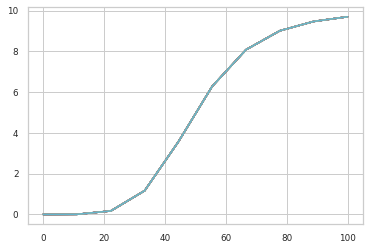

In [88]:
from tcpl.fit.crvfit import *
CV1 = CRCurve()
C1 = np.linspace(0,100,num=10)
X1 = FC.l2fc[0:30]
Y1 = CV1.hillF(x=C1,ga=50,tp=50,p=5)

R1 = pd.DataFrame(dict(conc=C1,l2fc=Y1))





In [128]:
from tcpl.fit.crvfit import *
CV1 = CRCurve()
n = 8
C1 = np.linspace(0.02,100,num=8)
X1 = pd.concat((FC.l2fc[0:20:2],FC.l2fc[20:-20:600],FC.l2fc[-20:-1:2])).to_list()
Y1 = CV1.hillF(x=C1,ga=50,tp=50,p=5)

R0 = pd.DataFrame(dict(c=C1,f=Y1,x=np.zeros(n),a=np.zeros(n)))
Res=[]
for x in X1:
    Ai = 2**(Y1-x)
    Ri = R0.copy()    
    Ri.x = x
    Ri.a = Ai
    Res.append(Ri)
Out1=pd.concat(Res)

In [129]:
Out1.head(10)

,c,f,x,a
0,0.020000,5.120000e-16,-11.545132,2.988346e+03
1,14.302857,9.558790e-02,-11.545132,3.193050e+03
2,28.585714,2.878176e+00,-11.545132,2.197092e+04
3,42.868571,1.583023e+01,-11.545132,1.741021e+08
4,57.151429,3.305732e+01,-11.545132,2.671007e+13
5,71.434286,4.280812e+01,-11.545132,2.301220e+16
6,85.717143,4.683699e+01,-11.545132,3.756383e+17
7,100.000000,4.848485e+01,-11.545132,1.177131e+18
0,0.020000,5.120000e-16,-11.040466,2.106258e+03
1,14.302857,9.558790e-02,-11.040466,2.250538e+03


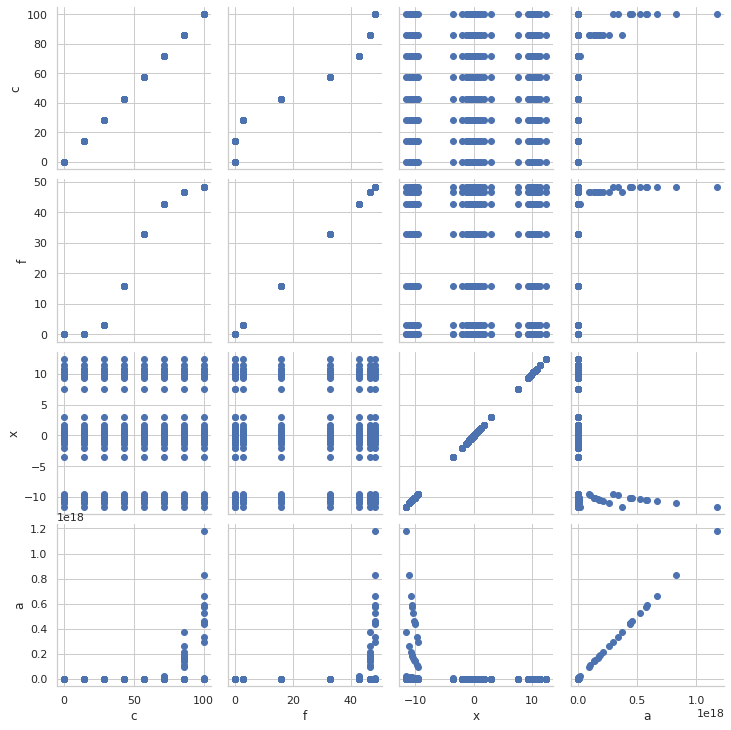

In [130]:
import seaborn as sns
sns.set(style = 'whitegrid')

g = sns.PairGrid(Out1)
g.map(pl.scatter)

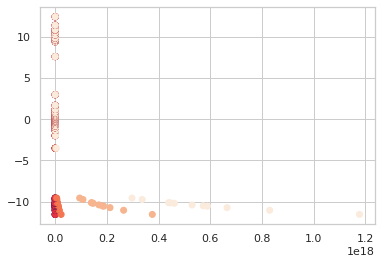

In [131]:
pl.scatter(Out1.a,Out1.x,c=Out1.c)

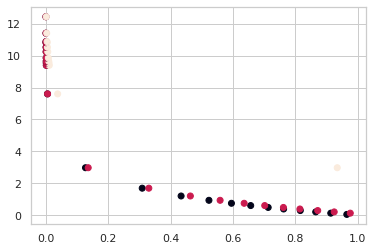

In [132]:
Out2 = Out1[(Out1.a<=1) & (Out1.a>=0)]
pl.scatter(Out2.a,Out2.x,c=Out2.c)